In [145]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import DistanceMetric
from sklearn.cluster import KMeans
import squarify
from kmodes.kprototypes import KPrototypes

In [38]:
train = pd.read_csv("./crime/crime/train.csv")
test = pd.read_csv("./crime/crime/test.csv")

In [39]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [40]:
test = pd.read_csv("./crime/crime/test.csv")

In [41]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


c:\users\arjun\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


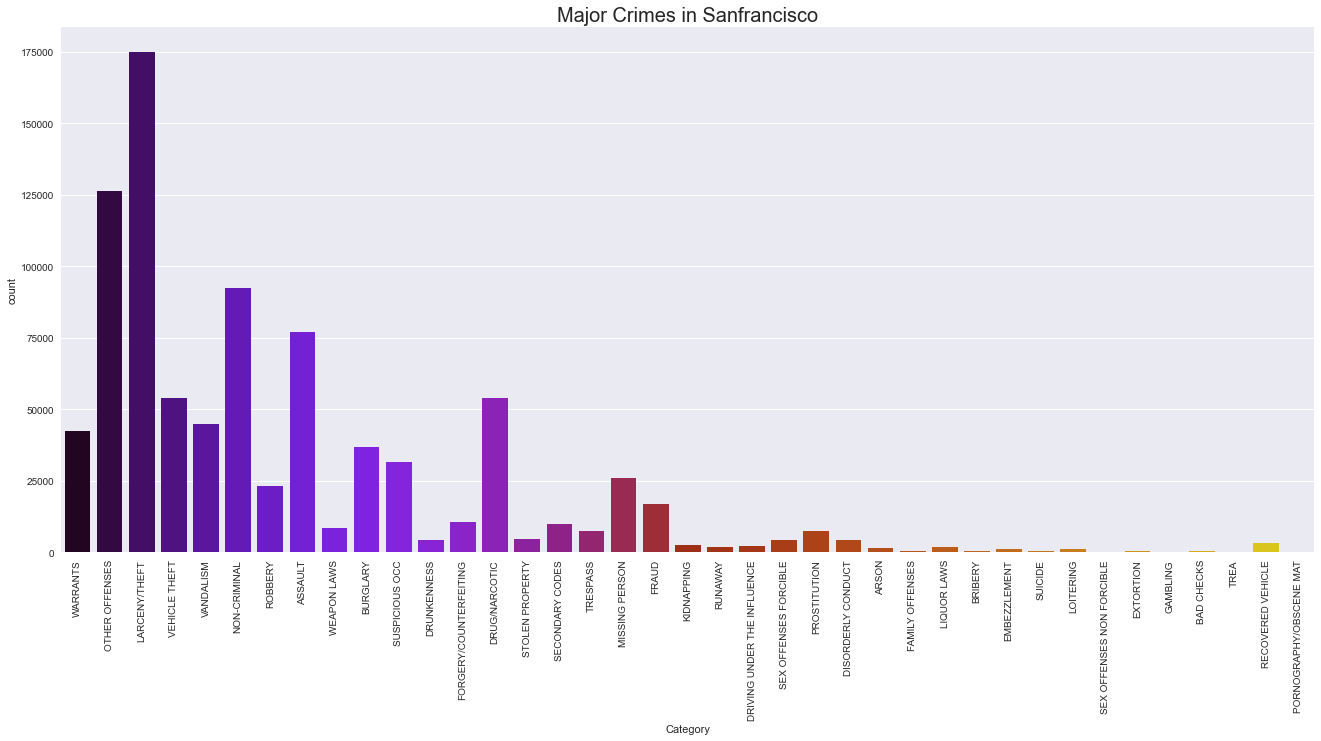

In [42]:
plt.rcParams['figure.figsize'] = (20, 9)

sns.countplot(train['Category'], palette = 'gnuplot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

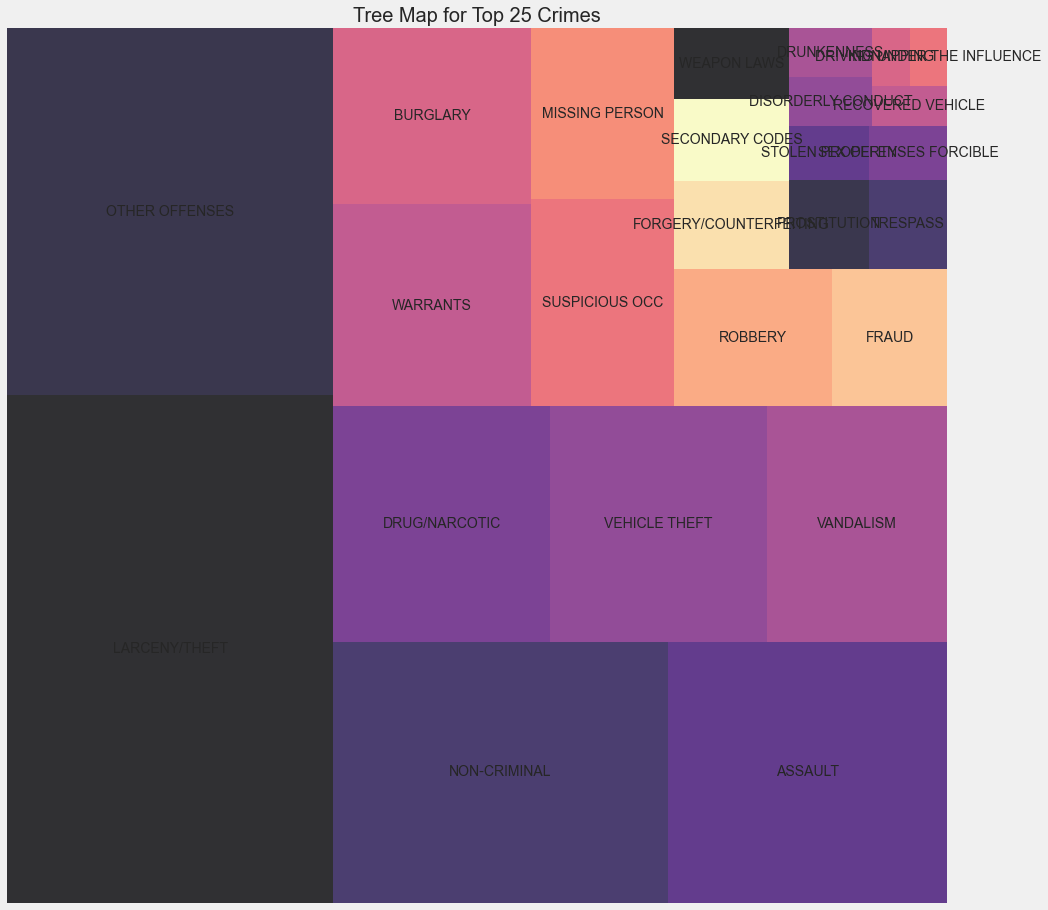

In [43]:
y = train['Category'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

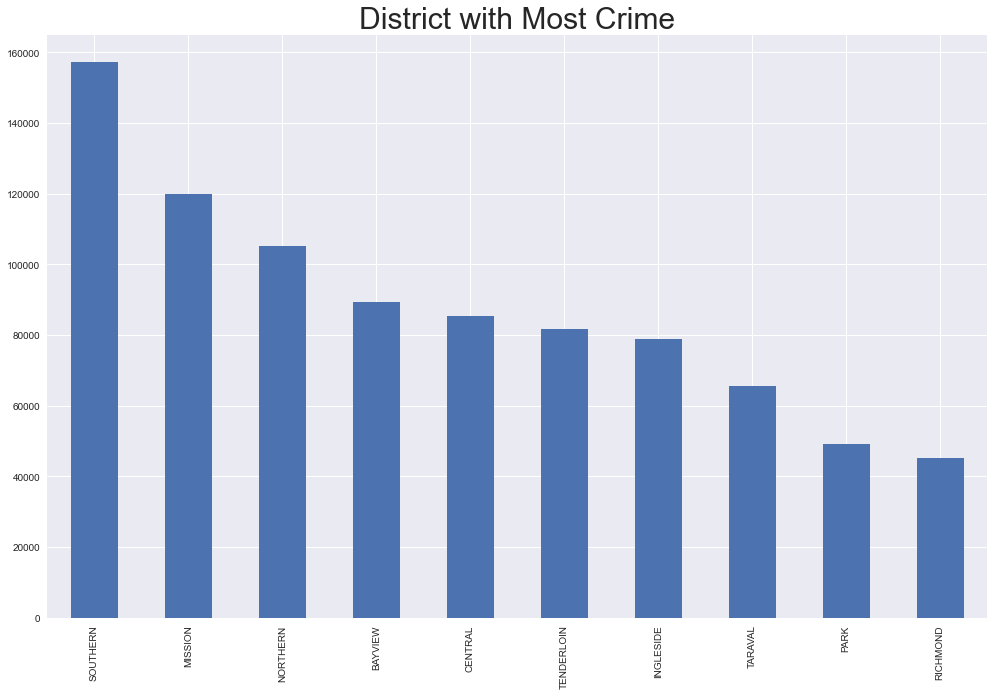

In [44]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

train['PdDistrict'].value_counts().plot.bar(figsize = (15, 10))

plt.title('District with Most Crime',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

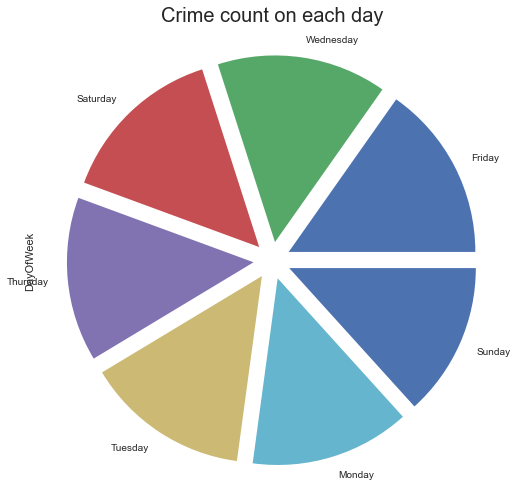

In [45]:
plt.style.use('seaborn')


train['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

In [46]:
train.isnull().sum()

Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [47]:
test.isnull().sum()

Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [48]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [49]:
descript_labels = (list(set(train["Descript"])))
DayOfWeek_labels = (list(set(train["DayOfWeek"])))
PdDistrict_labels = (list(set(train["PdDistrict"])))
Resolution_labels = (list(set(train["Resolution"])))
Address_labels = (list(set(train["Address"])))

In [50]:
descript_labels

['SALE OF BASE/ROCK COCAINE',
 'HAZARDOUS MATERIALS, DUMP OIL INTO SEWERS',
 'POSS OF TEAR GAS WEAPON',
 'ATTEMPTED PETTY THEFT OF PROPERTY',
 'SHORT CHANGE, PETTY THEFT',
 'MALICIOUS MISCHIEF, STREET CARS/BUSES',
 'ABANDONMENT OF CHILD',
 'PETTY THEFT SHOPLIFTING',
 'HAZARDOUS MATERIALS, SPILL LOAD',
 'BURGLARY,STORE UNDER CONSTRUCTION, ATT. FORCIBLE',
 'FALSE PRETENSES, PETTY THEFT',
 'GRAND THEFT AUTO STRIP',
 'ATTEMPTED SUICIDE BY FIRE',
 'VIOLATION OF CIVIL GANG INJUNCTION',
 'ESCAPES',
 'VANDALISM WITH NOXIOUS CHEMICAL',
 'VIOLATION OF CALIF UNEMPLOYMENT INSURANCE ACT',
 'CONSUMING ALCOHOL IN PUBLIC VIEW',
 'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE',
 'ARSON OF A VEHICLE',
 'DRIVES VEHICLE ALONG TRACK OF RAILROAD',
 'DRIVING WHILE UNDER THE INFLUENCE OF DRUGS, W/INJURY',
 'SOLICITING MINOR TO COMMIT FELONY',
 'CELLULAR OR CORDLESS PHONE COMMUNICATIONS, INTERCEPTING',
 'TAMPERING WITH MARKS ON FIREARM',
 'FIRE, UNLAWFULLY CAUSING',
 'INJURY TO TELEGRAPH/TELEPHONE LINES',
 'BUR

In [51]:
DayOfWeek_labels

['Thursday', 'Sunday', 'Saturday', 'Monday', 'Friday', 'Wednesday', 'Tuesday']

In [52]:
PdDistrict_labels

['RICHMOND',
 'BAYVIEW',
 'PARK',
 'TARAVAL',
 'INGLESIDE',
 'MISSION',
 'CENTRAL',
 'SOUTHERN',
 'TENDERLOIN',
 'NORTHERN']

In [53]:
Resolution_labels

['JUVENILE CITED',
 'PSYCHOPATHIC CASE',
 'ARREST, BOOKED',
 'ARREST, CITED',
 'JUVENILE BOOKED',
 'UNFOUNDED',
 'EXCEPTIONAL CLEARANCE',
 'NOT PROSECUTED',
 'JUVENILE ADMONISHED',
 'PROSECUTED BY OUTSIDE AGENCY',
 'PROSECUTED FOR LESSER OFFENSE',
 'COMPLAINANT REFUSES TO PROSECUTE',
 'JUVENILE DIVERTED',
 'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
 'CLEARED-CONTACT JUVENILE FOR MORE INFO',
 'NONE',
 'LOCATED']

In [54]:
Address_labels

['GRANDVIEW AV / 25TH ST',
 '400 Block of JOOST AV',
 'HEAD ST / SANTABARBARA AV',
 '100 Block of TRANSVERSE DR',
 'MISSION ST / HARRINGTON ST',
 '100 Block of COOK ST',
 '2700 Block of POLK ST',
 'TARAVAL ST / 32ND AV',
 '700 Block of 25TH ST',
 '0 Block of BERKSHIRE WY',
 '400 Block of LIBERTY ST',
 '25TH ST / CYPRESS ST',
 'LA GRANDE AV / BRAZIL AV',
 '500 Block of GRANT AV',
 'EDDY ST / BUCHANAN ST',
 '700 Block of UNION ST',
 '1600 Block of 11TH AV',
 '300 Block of GARCES DR',
 '2600 Block of JACKSON ST',
 'CALIFORNIA ST / FRONT ST',
 '15TH AV / TARAVAL ST',
 '200 Block of EUCALYPTUS DR',
 'TURK ST / WILLARDNORTH ST',
 '15TH ST / BRYANT ST',
 '300 Block of WASHINGTON ST',
 '100 Block of CHARLES ST',
 '22ND AV / BALBOA ST',
 'CHESTNUT ST / STEINER ST',
 '1900 Block of WEBSTER ST',
 'QUESADA AV / QUINT ST',
 'PLYMOUTH AV / SANRAMON WY',
 'THE EMBARCADERO SOUTH ST / SPEAR ST',
 '2200 Block of YORBA ST',
 '300 Block of MARKET ST',
 'ORIZABA AV / GRAFTON AV',
 '1100 Block of STEINER ST

In [55]:
one_hot_encoded_data = pd.get_dummies(train, columns = ['DayOfWeek', 'PdDistrict','Resolution'])

In [56]:
one_hot_encoded_data.head()

,Dates,Category,Descript,Address,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,...,Resolution_JUVENILE BOOKED,Resolution_JUVENILE CITED,Resolution_JUVENILE DIVERTED,Resolution_LOCATED,Resolution_NONE,Resolution_NOT PROSECUTED,Resolution_PROSECUTED BY OUTSIDE AGENCY,Resolution_PROSECUTED FOR LESSER OFFENSE,Resolution_PSYCHOPATHIC CASE,Resolution_UNFOUNDED
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [57]:
x = one_hot_encoded_data.drop(['Dates'], axis = 1)

In [58]:
x.head()

,Category,Descript,Address,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,...,Resolution_JUVENILE BOOKED,Resolution_JUVENILE CITED,Resolution_JUVENILE DIVERTED,Resolution_LOCATED,Resolution_NONE,Resolution_NOT PROSECUTED,Resolution_PROSECUTED BY OUTSIDE AGENCY,Resolution_PROSECUTED FOR LESSER OFFENSE,Resolution_PSYCHOPATHIC CASE,Resolution_UNFOUNDED
0,WARRANTS,WARRANT ARREST,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,OAK ST / LAGUNA ST,-122.425892,37.774599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,VANNESS AV / GREENWICH ST,-122.424363,37.800414,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,1500 Block of LOMBARD ST,-122.426995,37.800873,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,100 Block of BRODERICK ST,-122.438738,37.771541,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [59]:
x = one_hot_encoded_data.drop(['Category','Dates','Descript','Address'], axis = 1)

In [60]:
x.head()

,X,Y,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_BAYVIEW,...,Resolution_JUVENILE BOOKED,Resolution_JUVENILE CITED,Resolution_JUVENILE DIVERTED,Resolution_LOCATED,Resolution_NONE,Resolution_NOT PROSECUTED,Resolution_PROSECUTED BY OUTSIDE AGENCY,Resolution_PROSECUTED FOR LESSER OFFENSE,Resolution_PSYCHOPATHIC CASE,Resolution_UNFOUNDED
0,-122.425892,37.774599,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-122.425892,37.774599,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-122.424363,37.800414,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-122.426995,37.800873,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-122.438738,37.771541,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [61]:
y = train["Category"]

In [62]:
y[0]

'WARRANTS'

In [63]:
train1 = train.head(1000)

In [64]:
'''Kmean = KMeans(n_clusters=39)
Kmean.fit(x)'''

'Kmean = KMeans(n_clusters=39)\nKmean.fit(x)'

In [65]:
train1

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
995,2015-05-11 11:00:00,FRAUD,FRAUDULENT CREDIT APPLICATION,Monday,MISSION,NONE,400 Block of DOLORES ST,-122.426341,37.762579
996,2015-05-11 11:00:00,FRAUD,"CREDIT CARD, THEFT BY USE OF",Monday,MISSION,NONE,400 Block of DOLORES ST,-122.426341,37.762579
997,2015-05-11 11:00:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Monday,RICHMOND,NONE,3200 Block of BALBOA ST,-122.493588,37.775941
998,2015-05-11 11:00:00,MISSING PERSON,MISSING JUVENILE,Monday,INGLESIDE,NONE,200 Block of CAYUGA AV,-122.433422,37.730390


In [66]:
x = train1.drop(['Category','Dates','Descript','Address'], axis = 1)

In [67]:
y = one_hot_encoded_data["Category"]

In [68]:
#checking out the data

In [69]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [70]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 36.8+ MB


In [71]:
train['Category'].value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [72]:
train['PdDistrict'].value_counts()

SOUTHERN      157182
MISSION       119908
NORTHERN      105296
BAYVIEW        89431
CENTRAL        85460
TENDERLOIN     81809
INGLESIDE      78845
TARAVAL        65596
PARK           49313
RICHMOND       45209
Name: PdDistrict, dtype: int64

In [73]:
train['DayOfWeek'].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [74]:
train['Resolution'].value_counts()

NONE                                      526790
ARREST, BOOKED                            206403
ARREST, CITED                              77004
LOCATED                                    17101
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
JUVENILE BOOKED                             5564
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
NOT PROSECUTED                              3714
JUVENILE CITED                              3332
PROSECUTED BY OUTSIDE AGENCY                2504
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE DIVERTED                            355
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
PROSECUTED FOR LESSER OFFENSE                 51
Name: Resolution, dtype: int64

In [75]:
train[['X','Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422616,37.771020
std,0.030354,0.456893
min,-122.513642,37.707879
25%,-122.432952,37.752427
50%,-122.416420,37.775421
75%,-122.406959,37.784369
max,-120.500000,90.000000


In [76]:
#dealing with outliers 

In [77]:
train['Y'].replace(to_replace= train['Y'].max() ,value=np.nan, inplace=True)
train['X'].replace(to_replace= train['X'].max() ,value=np.nan, inplace=True)

In [78]:
train.isnull().sum()

Dates          0
Category       0
Descript       0
DayOfWeek      0
PdDistrict     0
Resolution     0
Address        0
X             67
Y             67
dtype: int64

In [79]:
test['Y'].replace(to_replace= test['Y'].max() ,value=np.nan, inplace=True)
test['X'].replace(to_replace= test['X'].max() ,value=np.nan, inplace=True)

In [80]:
data = [train, test]

for dataset in data:
    mean_X = dataset["X"].mean()
    std_X = dataset["X"].std()
    mean_Y = dataset["Y"].mean()
    std_Y = dataset["Y"].std()
    max_X = mean_X + std_X
    min_X = mean_X - std_X
    max_Y = mean_Y + std_Y
    min_Y = mean_Y - std_Y

    is_null = dataset['Y'].isnull().sum()
    random_X = (max_X - min_X) * np.random.randn(is_null) + min_X
    random_Y = (max_Y - min_Y) * np.random.randn(is_null) + min_Y

    X_slice = dataset['X'].copy()
    Y_slice = dataset['Y'].copy()
    X_slice[np.isnan(X_slice)] = random_X
    Y_slice[np.isnan(Y_slice)] = random_Y
    dataset['X'] = X_slice
    dataset['Y'] = Y_slice

In [81]:
train[['X', 'Y']].describe()

,X,Y
count,878049.000000,878049.000000
mean,-122.422766,37.767033
std,0.025289,0.024168
min,-122.562892,37.637960
25%,-122.432952,37.752427
50%,-122.416422,37.775421
75%,-122.406959,37.784368
max,-122.312612,37.830764


In [82]:
test.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [83]:
#converting time into a usable format

In [84]:
train["Dates"] = pd.to_datetime(train["Dates"], format="%Y-%m-%d %H:%M:%S")
test["Dates"] = pd.to_datetime(test["Dates"], format="%Y-%m-%d %H:%M:%S")

In [85]:
train["Minute"] = train["Dates"].map(lambda x: x.minute)
test["Minute"] = test["Dates"].map(lambda x: x.minute)

In [86]:
train["Hour"] = train["Dates"].map(lambda x: x.hour)
test["Hour"] = test["Dates"].map(lambda x: x.hour)

In [87]:
train["Day"] = train["Dates"].map(lambda x: x.day)
test["Day"] = test["Dates"].map(lambda x: x.day)

In [88]:
train["Month"] = train["Dates"].map(lambda x: x.month)
test["Month"] = test["Dates"].map(lambda x: x.month)

In [89]:
train["Year"] = train["Dates"].map(lambda x: x.year)
test["Year"] = test["Dates"].map(lambda x: x.year)

In [90]:
def get_hour_zone(hour):
    if hour >= 2 and hour < 8: 
        return 0
    elif hour >= 8 and hour < 12: 
        return 1
    elif hour >= 12 and hour < 18: 
        return 2
    elif hour >= 18 and hour < 22: 
        return 3
    elif hour < 2 or hour >= 22: 
        return 4
    
train["Hour_Zone"] = train["Hour"].map(get_hour_zone)
test["Hour_Zone"] = test["Hour"].map(get_hour_zone)

In [91]:
train["WeekOfYear"] = train["Dates"].map(lambda x: int(x.weekofyear / 2) - 1)
test["WeekOfYear"] = test["Dates"].map(lambda x: int(x.weekofyear / 2))

print(sorted(train['WeekOfYear'].unique()))
print(sorted(test['WeekOfYear'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [92]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9


In [93]:
#taking holiday and buisiness hours into consideration

In [94]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal = calendar()
holidays = cal.holidays(start=train['Dates'].min(), end=train['Dates'].max())
train['Holiday'] = train['Dates'].dt.date.astype('datetime64').isin(holidays)

In [95]:
cal = calendar()
holidays = cal.holidays(start=test['Dates'].min(), end=test['Dates'].max())
test['Holiday'] = test['Dates'].dt.date.astype('datetime64').isin(holidays)

In [96]:
len(train[train['Holiday'] == True])

25653

In [97]:
from datetime import datetime, time

def time_in_range(start, end, x):
    """Return true if x is in the inclusive range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

def map_business_hours(date):
    time_parsed = date.time()
    business_start = time(8, 0, 0)
    business_end = time(18, 0, 0)
    
    if time_in_range(business_start, business_end, time_parsed):
        return 1
    else:
        return 0
    
train['BusinessHour'] = train['Dates'].map(map_business_hours).astype('uint8')
test['BusinessHour'] = test['Dates'].map(map_business_hours).astype('uint8')

In [98]:
train['BusinessHour'].value_counts()

1    455215
0    422834
Name: BusinessHour, dtype: int64

In [99]:
train.head(12)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9,False,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9,False,0
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9,False,0
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431,30,23,13,5,2015,4,9,False,0
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138,30,23,13,5,2015,4,9,False,0
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564,30,23,13,5,2015,4,9,False,0
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601,0,23,13,5,2015,4,9,False,0
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802,0,23,13,5,2015,4,9,False,0


In [100]:
train['Season']=(train['Month']%12 + 3)//3
test['Season']=(test['Month']%12 + 3)//3

In [101]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,Hour,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0,2
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,23,13,5,2015,4,9,False,0,2
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,23,13,5,2015,4,9,False,0,2
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,23,13,5,2015,4,9,False,0,2
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,23,13,5,2015,4,9,False,0,2


In [102]:
days = {'Monday':0 ,'Tuesday':0 ,'Wednesday':0 ,'Thursday':0 ,'Friday':0, 'Saturday':1 ,'Sunday':1}

train['Weekend'] = train['DayOfWeek'].replace(days).astype('uint8')
test['Weekend'] = test['DayOfWeek'].replace(days).astype('uint8')

In [103]:
train['Address'].value_counts().index

Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '900 Block of MARKET ST', '0 Block of TURK ST', '0 Block of 6TH ST',
       '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       '16TH ST / MISSION ST',
       ...
       'IRIS AV / EUCLID AV', 'VAN DYKE AV / LANE ST', '500 Block of STILL ST',
       '0 Block of KENWOOD WY', 'ELWOOD ST / MASON ST',
       'SHOTWELL ST / MIRABEL AV', 'STAPLES AV / DETROIT ST',
       'ECKER ST / STEVENSON ST', 'FAIR AV / LUNDYS LN',
       'CLIPPER ST / DIAMONDHEIGHTS BL'],
      dtype='object', length=23228)

In [104]:
import re

    
def find_streets(address):
    street_types = ['AV', 'ST', 'CT', 'PZ', 'LN', 'DR', 'PL', 'HY', 
                    'FY', 'WY', 'TR', 'RD', 'BL', 'WAY', 'CR', 'AL', 'I-80',  
                    'RW', 'WK','EL CAMINO DEL MAR']
    street_pattern = '|'.join(street_types)
    streets = re.findall(street_pattern, address)
    if len(streets) == 0:
        # Debug
#         print(address)
        return 'OTHER'
    elif len(streets) == 1:
        return streets[0]
    else:
#         print(address)
        return 'INT'

train['StreetType'] = train['Address'].map(find_streets)
test['StreetType'] = test['Address'].map(find_streets)

In [105]:
train['StreetType'].value_counts()

INT                  389995
ST                   358797
AV                    92467
BL                    13074
DR                     8200
WY                     4063
RD                     2384
PZ                     2347
CT                     2059
LN                     1356
PL                      863
HY                      819
TR                      766
I-80                    322
CR                      291
AL                      150
WAY                      55
EL CAMINO DEL MAR        21
OTHER                    14
WK                        5
RW                        1
Name: StreetType, dtype: int64

In [106]:
train.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,13,5,2015,4,9,False,0,2,0,INT
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,13,5,2015,4,9,False,0,2,0,INT


In [108]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Day,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,13,5,2015,4,9,False,0,2,0,INT
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,13,5,2015,4,9,False,0,2,0,INT
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,...,13,5,2015,4,9,False,0,2,0,INT
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,...,13,5,2015,4,9,False,0,2,0,INT
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,...,13,5,2015,4,9,False,0,2,0,ST


In [109]:
def find_block_number(address):
    block_num_pattern = '[0-9]+\s[Block]'
    block_num = re.search(block_num_pattern, address)
    if block_num:
        num_pattern = '[0-9]+'
        block_no_pos = re.search(num_pattern, address)
        block_no = int(block_no_pos.group())
        block_map = (block_no // 100) + 1
        return block_map
    else:
        return 0


train['BlockNo'] = train['Address'].map(find_block_number)
test['BlockNo'] = test['Address'].map(find_block_number)

In [110]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType,BlockNo
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,5,2015,4,9,False,0,2,0,INT,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,53,...,5,2015,4,9,False,0,2,0,INT,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,33,...,5,2015,4,9,False,0,2,0,INT,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,30,...,5,2015,4,9,False,0,2,0,INT,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,30,...,5,2015,4,9,False,0,2,0,ST,2


In [128]:
trans = StandardScaler()
train['X'] = trans.fit_transform(train['X'].values.reshape(-1,1))
train['Y'] = trans.fit_transform(train['Y'].values.reshape(-1,1))
test['X'] = trans.fit_transform(test['X'].values.reshape(-1,1))
test['Y'] = trans.fit_transform(test['Y'].values.reshape(-1,1))

In [129]:
train['X']

0        -0.123611
1        -0.123611
2        -0.063162
3        -0.167253
4        -0.631583
            ...   
878044   -1.434135
878045   -0.972680
878046    0.766168
878047    1.274655
878048    1.100889
Name: X, Length: 878049, dtype: float64

In [130]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType,BlockNo
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,2015,4,9,False,0,2,0,INT,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,2015,4,9,False,0,2,0,INT,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.063162,1.381239,33,...,5,2015,4,9,False,0,2,0,INT,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-0.167253,1.400202,30,...,5,2015,4,9,False,0,2,0,INT,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-0.631583,0.186554,30,...,5,2015,4,9,False,0,2,0,ST,2


In [138]:
pd_districts = {'SOUTHERN':0, 'MISSION':1, 'NORTHERN':2, 'CENTRAL':3, 'BAYVIEW':4, 'INGLESIDE':5, 
                'TENDERLOIN':6, 'TARAVAL':7, 'PARK':8, 'RICHMOND':9}

train['PdDistrict'].replace(pd_districts, inplace=True)
test['PdDistrict'].replace(pd_districts, inplace=True)

In [140]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType,BlockNo
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,2015,4,9,False,0,2,0,INT,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,2015,4,9,False,0,2,0,INT,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,2,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.063162,1.381239,33,...,5,2015,4,9,False,0,2,0,INT,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,2,NONE,1500 Block of LOMBARD ST,-0.167253,1.400202,30,...,5,2015,4,9,False,0,2,0,INT,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,8,NONE,100 Block of BRODERICK ST,-0.631583,0.186554,30,...,5,2015,4,9,False,0,2,0,ST,2


In [146]:
data = [train, test]

for dataset in data:
    year_le = LabelEncoder()
    year_le.fit(dataset['Year'].unique())
    print(list(year_le.classes_))

    dataset['Year']=year_le.transform(dataset['Year']) 
train['Year'].unique()
dict(zip(year_le.classes_, year_le.transform(year_le.classes_)))

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


{2003: 0,
 2004: 1,
 2005: 2,
 2006: 3,
 2007: 4,
 2008: 5,
 2009: 6,
 2010: 7,
 2011: 8,
 2012: 9,
 2013: 10,
 2014: 11,
 2015: 12}

In [158]:
data = [train, test]

for dataset in data:
    dow_le = LabelEncoder()
    dow_le.fit(dataset['DayOfWeek'].unique())
    print(list(dow_le.classes_))
    dataset['DayOfWeek']=dow_le.transform(dataset['DayOfWeek'])

[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6]


In [154]:
train['DayOfWeek'].unique()

array([6, 5, 1, 3, 2, 0, 4])

In [155]:
dict(zip(dow_le.classes_, dow_le.transform(dow_le.classes_)))

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6}

In [157]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType,BlockNo
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,6,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,12,4,9,False,0,2,0,INT,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,6,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,12,4,9,False,0,2,0,INT,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,6,2,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.063162,1.381239,33,...,5,12,4,9,False,0,2,0,INT,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2,NONE,1500 Block of LOMBARD ST,-0.167253,1.400202,30,...,5,12,4,9,False,0,2,0,INT,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,8,NONE,100 Block of BRODERICK ST,-0.631583,0.186554,30,...,5,12,4,9,False,0,2,0,ST,2


In [159]:
data = [train, test]

for dataset in data:
    st_le = LabelEncoder()
    st_le.fit(dataset['StreetType'].unique())
    print(list(st_le.classes_))
    dataset['StreetType']=st_le.transform(dataset['StreetType'])

['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']
['AL', 'AV', 'BL', 'CR', 'CT', 'DR', 'EL CAMINO DEL MAR', 'HY', 'I-80', 'INT', 'LN', 'OTHER', 'PL', 'PZ', 'RD', 'RW', 'ST', 'TR', 'WAY', 'WK', 'WY']


In [160]:
train['Holiday'].replace(False, 0, inplace=True)
train['Holiday'].replace(True, 1, inplace=True)
test['Holiday'].replace(False, 0, inplace=True)
test['Holiday'].replace(True, 1, inplace=True)

train['Holiday'] = train['Holiday'].astype('uint8')
train['Holiday'] = train['Holiday'].astype('uint8')

In [164]:
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType,BlockNo
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,6,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,12,4,9,0,0,2,0,9,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,6,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,12,4,9,0,0,2,0,9,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,6,2,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.063162,1.381239,33,...,5,12,4,9,0,0,2,0,9,0
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,2,NONE,1500 Block of LOMBARD ST,-0.167253,1.400202,30,...,5,12,4,9,0,0,2,0,9,16
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,6,8,NONE,100 Block of BRODERICK ST,-0.631583,0.186554,30,...,5,12,4,9,0,0,2,0,16,2


In [165]:
data = [train]

for dataset in data:
    cat_le = LabelEncoder()
    cat_le.fit(dataset['Category'].unique())
    print(list(cat_le.classes_))
    dataset['Category']=cat_le.transform(dataset['Category'])

['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY', 'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE', 'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION', 'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING', 'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING', 'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES', 'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE', 'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE', 'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE', 'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT', 'WARRANTS', 'WEAPON LAWS']


In [166]:
train.head(5)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Minute,...,Month,Year,Hour_Zone,WeekOfYear,Holiday,BusinessHour,Season,Weekend,StreetType,BlockNo
0,2015-05-13 23:53:00,37,WARRANT ARREST,6,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,12,4,9,0,0,2,0,9,0
1,2015-05-13 23:53:00,21,TRAFFIC VIOLATION ARREST,6,2,"ARREST, BOOKED",OAK ST / LAGUNA ST,-0.123611,0.313061,53,...,5,12,4,9,0,0,2,0,9,0
2,2015-05-13 23:33:00,21,TRAFFIC VIOLATION ARREST,6,2,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-0.063162,1.381239,33,...,5,12,4,9,0,0,2,0,9,0
3,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,2,NONE,1500 Block of LOMBARD ST,-0.167253,1.400202,30,...,5,12,4,9,0,0,2,0,9,16
4,2015-05-13 23:30:00,16,GRAND THEFT FROM LOCKED AUTO,6,8,NONE,100 Block of BRODERICK ST,-0.631583,0.186554,30,...,5,12,4,9,0,0,2,0,16,2


In [167]:
dict(zip(cat_le.classes_, cat_le.transform(cat_le.classes_)))

{'ARSON': 0,
 'ASSAULT': 1,
 'BAD CHECKS': 2,
 'BRIBERY': 3,
 'BURGLARY': 4,
 'DISORDERLY CONDUCT': 5,
 'DRIVING UNDER THE INFLUENCE': 6,
 'DRUG/NARCOTIC': 7,
 'DRUNKENNESS': 8,
 'EMBEZZLEMENT': 9,
 'EXTORTION': 10,
 'FAMILY OFFENSES': 11,
 'FORGERY/COUNTERFEITING': 12,
 'FRAUD': 13,
 'GAMBLING': 14,
 'KIDNAPPING': 15,
 'LARCENY/THEFT': 16,
 'LIQUOR LAWS': 17,
 'LOITERING': 18,
 'MISSING PERSON': 19,
 'NON-CRIMINAL': 20,
 'OTHER OFFENSES': 21,
 'PORNOGRAPHY/OBSCENE MAT': 22,
 'PROSTITUTION': 23,
 'RECOVERED VEHICLE': 24,
 'ROBBERY': 25,
 'RUNAWAY': 26,
 'SECONDARY CODES': 27,
 'SEX OFFENSES FORCIBLE': 28,
 'SEX OFFENSES NON FORCIBLE': 29,
 'STOLEN PROPERTY': 30,
 'SUICIDE': 31,
 'SUSPICIOUS OCC': 32,
 'TREA': 33,
 'TRESPASS': 34,
 'VANDALISM': 35,
 'VEHICLE THEFT': 36,
 'WARRANTS': 37,
 'WEAPON LAWS': 38}